In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

### Метод прогонки для пункта 1.
Внесем в наш код данные нам параметры. Рассматривать функции будем на отрезке $[0,1]$.

In [2]:
def q(x):
    return 7 / (x + 1)**2

def f(x):
    return x + 1

def u(x):
    return (x + 1)**3

A, B = 1, 8
a, b, N = 0, 1, 1000
h = (b - a) / N

x = np.linspace(a, b, N + 1)

Внесем наши коэффициенты для метода прогонки.

In [3]:
alpha = [0]
gamma = [1]
beta = [0]
g = [A]

for i in range(1, N):
    alpha.append(1 / h**2)
    gamma.append(-2 / h**2 - q(x[i]))
    beta.append(1 / h**2)
    g.append(-f(x[i]))

alpha.append(0)
gamma.append(1)
beta.append(0)
g.append(B)

Реализуем метод прогонки для нашей разностной схемы.

In [4]:
def tridiagonal_algorithm(a,b,c,f):
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))

    x[n-1] = beta[n - 1]

    for i in range(n - 1, 0, -1):
        x[i - 1] = alpha[i - 1] * x[i] + beta[i - 1]

    return x

u_approx = tridiagonal_algorithm(alpha, beta, gamma, g)

Построим графики реального решения и полученного с помощью метода прогонки.

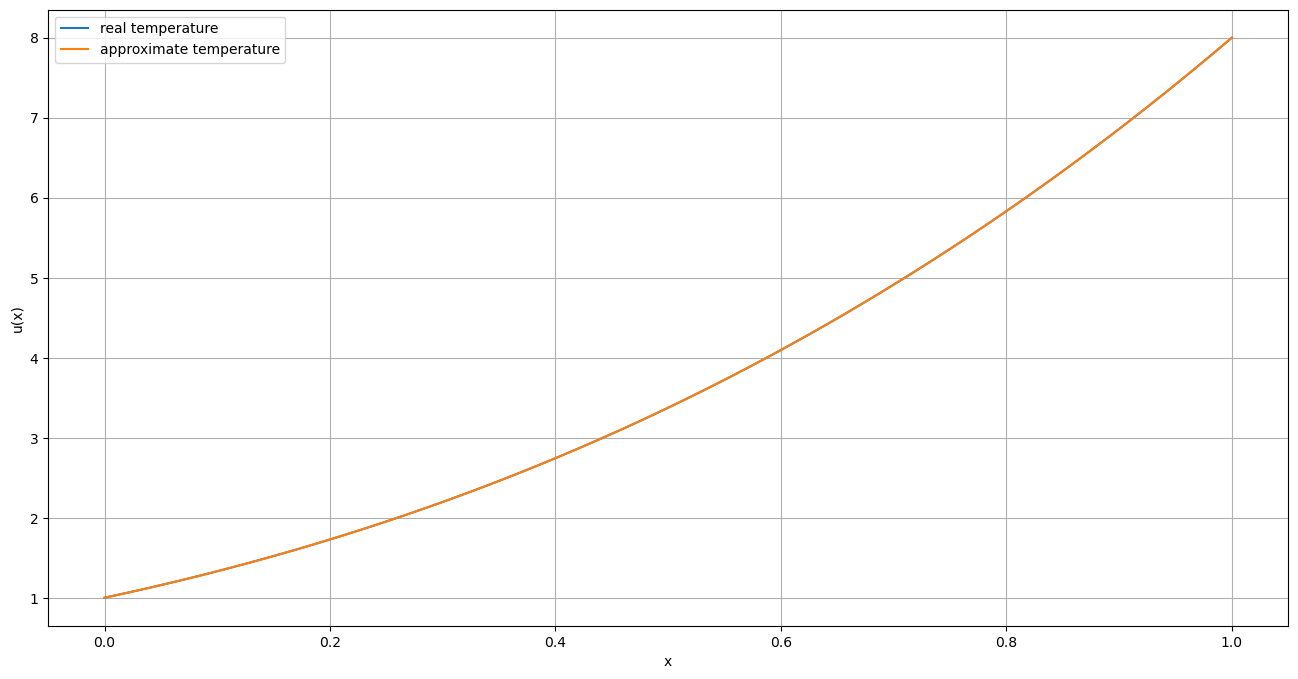

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(x, u(x), label='real temperature')
plt.plot(x, u_approx, label='approximate temperature')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

Графики получились идентичными, для того, чтобы в этом убедиться, посчитаем средний квадрат ошибки, который вычисляется следующим образом:
$$MSE=\frac{1}{N} \sum_{i=0}^N u(x_i)-\hat{u}(x_i),$$
где $u(x_i) - $точное решение, $\hat{u}(x_i) - $приближенное решение.

In [6]:
mean_squared_error(u(x), u_approx)

7.600835806367376e-25

И правда, ошибка у нас равна крайне малому значению, что позволяет сделать вывод о том, что решение, полученное методом прогонки является достаточно качественным.

## Метод прогонки для пункта 2.

Внесем все полученные коэффициенты, используемые в разностной схеме, полученной методом баланса.

In [18]:
def d_i(x, h):
    return -7 / h * (1 / (x + h / 2 + 1) - 1 / (x - h / 2 + 1)) 

def phi_i(x, h):
    return 1 / h * (x - h / 2 - x - h / 2 + ((x - h / 2)**2 - (x + h / 2)**2) / 2)

Зададим коэффициенты метода прогонки

In [42]:
alpha = [0]
gamma = [1]
beta = [0]
g = [A]

for i in range(1, N):
    alpha.append(1 / h**2)
    gamma.append(- (2) / h**2 - d_i(x[i], h))
    beta.append(1 / h**2)
    g.append(-phi_i(x[i], h))

alpha.append(0)
gamma.append(1)
beta.append(0)
g.append(B)

Перейдем к визуализации.

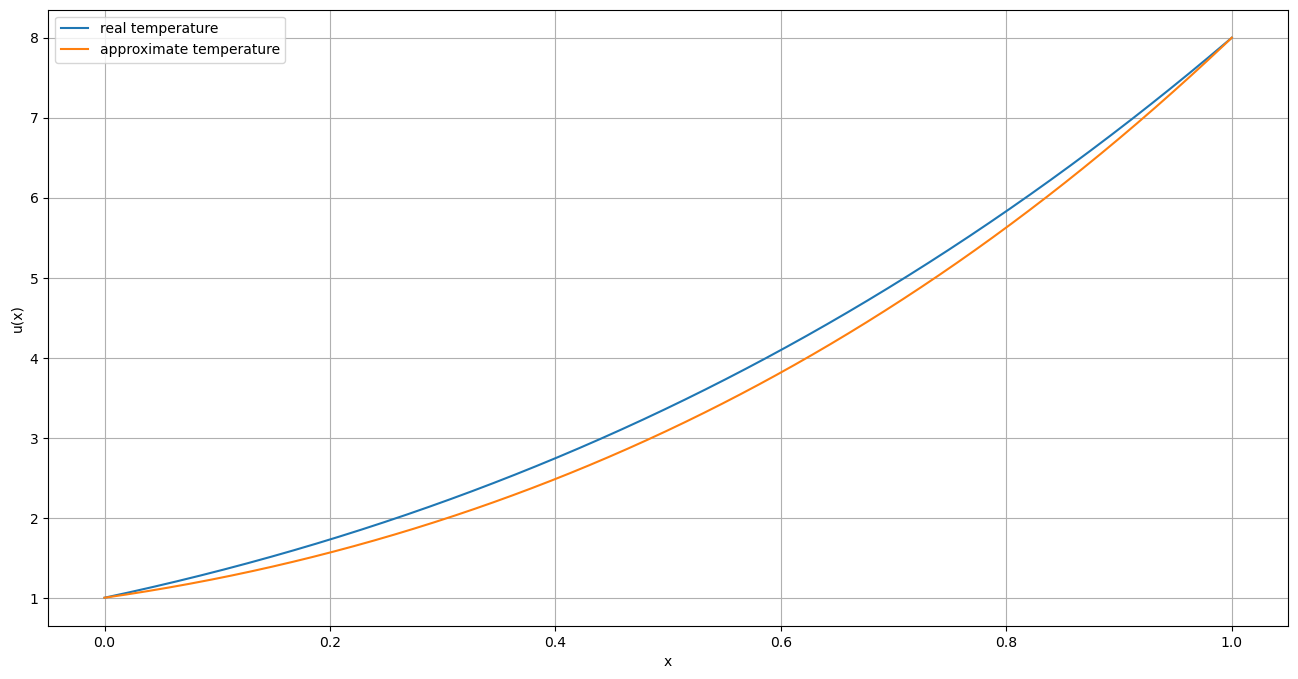

In [43]:
u_approx = tridiagonal_algorithm(alpha, beta, gamma, g)

plt.figure(figsize=(16, 8))
plt.plot(x, u(x), label='real temperature')
plt.plot(x, u_approx, label='approximate temperature')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

Видно, что кривые немного отличаются. Для того, чтобы оценить эту неточность, посчитаем, анлогично первому пункту, MSE.

In [45]:
mean_squared_error(u(x), u_approx)

0.04293360244618271

Из этого можно сделать вывод о том, что метод прогонки для разностной схемы, построенной методом баланса, работает неплохо, но не идеально.